In [1]:
import numpy as np
import pandas as pd
import main
fake_data_wc = pd.read_csv('fake_data/fake_wc_res.csv', delimiter=';')
fake_data_wc.head()

,ID,X,Y,WC
0,0,348202,6460000,1.700000e+38
1,1,348202,6460000,1.700000e+38
2,2,348202,6460000,1.700000e+38
3,3,348202,6460000,1.700000e+38
4,4,348202,6460000,1.700000e+38


In [2]:
# Конвертируем форматы
fake_data_wc['WC'] = fake_data_wc['WC'].astype('float64')
fake_data_wc['ID'] = fake_data_wc['ID'].astype('str')
fake_data_wc['WELL_NAME'] = 'fake_' + fake_data_wc['ID']
del fake_data_wc['ID']
fake_data_wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5399 entries, 0 to 5398
Data columns (total 4 columns):
X            5399 non-null int64
Y            5399 non-null int64
WC           5399 non-null float64
WELL_NAME    5399 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 168.8+ KB


In [3]:
fake_data_wc.describe()

,X,Y,WC
count,5399.000000,5.399000e+03,5.399000e+03
mean,353124.948694,6.465675e+06,2.393036e+36
std,2180.726934,4.954670e+03,2.002907e+37
min,348202.000000,6.460000e+06,1.300000e-01
25%,351602.000000,6.460000e+06,2.700000e-01
50%,353302.000000,6.470000e+06,3.200000e-01
75%,354702.000000,6.470000e+06,3.600000e-01
max,357802.000000,6.470000e+06,1.700000e+38


In [4]:
# Удаляем значения зашедшие за край
fake_data_wc = fake_data_wc.drop(fake_data_wc[fake_data_wc['WC'] > 1].index)
fake_data_wc.describe()

,X,Y,WC
count,5323.000000,5.323000e+03,5323.000000
mean,353157.138080,6.465756e+06,0.318732
std,2158.768029,4.942957e+03,0.070173
min,348302.000000,6.460000e+06,0.130000
25%,351602.000000,6.460000e+06,0.270000
50%,353402.000000,6.470000e+06,0.320000
75%,354802.000000,6.470000e+06,0.360000
max,357802.000000,6.470000e+06,0.620000


In [5]:
fake_las_out = pd.read_csv('fake_data/fake_las_out.csv', delimiter=';')
fake_las_out.head()

,WELL_NAME,DEPTH,APS
0,fake_0,2584.999314,0.380130
1,fake_0,2585.121187,0.380130
2,fake_0,2585.121309,0.364062
3,fake_0,2585.243182,0.364062
4,fake_0,2585.243304,0.309785


In [6]:
fake_bottom = pd.read_csv('fake_data/fake_bottom_res.csv', delimiter=';')
fake_bottom['ID'] = fake_bottom['ID'].astype('str')
fake_bottom['WELL_NAME'] = 'fake_' + fake_bottom['ID']
fake_bottom = fake_bottom.rename(columns={'DEPTH': 'DEPTH_BOTTOM'})
del fake_bottom['ID']
del fake_bottom['X']
del fake_bottom['Y']
fake_bottom.head()

,DEPTH_BOTTOM,WELL_NAME
0,2601.50,fake_0
1,2600.09,fake_1
2,2598.85,fake_2
3,2598.79,fake_3
4,2599.31,fake_4


In [7]:
fake_top = pd.read_csv('fake_data/fake_top_res.csv', delimiter=';')
fake_top['ID'] = fake_top['ID'].astype('str')
fake_top['WELL_NAME'] = 'fake_' + fake_top['ID']
fake_top = fake_top.rename(columns={'DEPTH': 'DEPTH_TOP'})
del fake_top['ID']
del fake_top['X']
del fake_top['Y']
fake_top.head()

,DEPTH_TOP,WELL_NAME
0,2585.02,fake_0
1,2582.98,fake_1
2,2581.22,fake_2
3,2580.52,fake_3
4,2580.87,fake_4


In [8]:
fake_data = pd.merge(fake_data_wc, fake_las_out, on='WELL_NAME')
fake_data = pd.merge(fake_data, fake_top, on='WELL_NAME') 
fake_data = pd.merge(fake_data, fake_bottom, on='WELL_NAME')
fake_data.head()

,X,Y,WC,WELL_NAME,DEPTH,APS,DEPTH_TOP,DEPTH_BOTTOM
0,348302,6460000,0.39,fake_24,2588.656453,0.274434,2588.27,2603.89
1,348302,6460000,0.39,fake_24,2588.771455,0.274434,2588.27,2603.89
2,348302,6460000,0.39,fake_24,2588.771570,0.274434,2588.27,2603.89
3,348302,6460000,0.39,fake_24,2588.886333,0.191055,2588.27,2603.89
4,348302,6460000,0.39,fake_24,2588.886448,0.101674,2588.27,2603.89


In [9]:
wells_aps_neg = np.unique(fake_data[fake_data['APS']<0]['WELL_NAME'].tolist())
print(len(wells_aps_neg))
# wells_aps_neg

wells_aps_more = np.unique(fake_data[fake_data['APS']>1]['WELL_NAME'].tolist())
print(len(wells_aps_more))

wells_aps_bad = []
wells_aps_bad.extend(wells_aps_neg)
wells_aps_bad.extend(wells_aps_more)
wells_aps_bad = np.unique(wells_aps_bad)
print(len(wells_aps_bad))

1938
519
2311


In [10]:
wells_aps_neg

array(['fake_1005', 'fake_1006', 'fake_1007', ..., 'fake_970', 'fake_982',
       'fake_983'], 
      dtype='<U9')

-0.026965816
0.8732771277


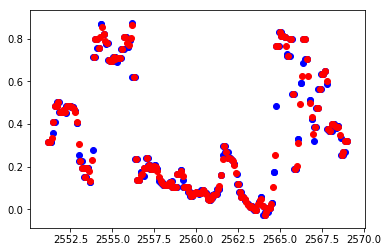

In [11]:
fake_1005 = fake_data[fake_data['WELL_NAME'] == 'fake_1005']
print(fake_1005['APS'].min())
print(fake_1005['APS'].max())
import matplotlib.pyplot as plt


from scipy import interpolate
f_spline = interpolate.interp1d(fake_1005['DEPTH'], fake_1005['APS'], kind = 'slinear')
xxx = np.arange(np.min(fake_1005['DEPTH']), np.max(fake_1005['DEPTH']), 0.1)
yyy = f_spline(xxx)

plt.scatter(fake_1005['DEPTH'], fake_1005['APS'], color = 'blue')
plt.scatter(xxx, yyy, color = 'red')
plt.show()
        

C:\Users\M1\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


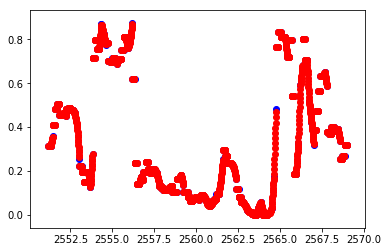

In [12]:
fake_1005
mask = fake_1005.APS < 0
column_name = 'APS'
fake_1005.loc[mask, column_name] = 0
fake_1005['APS'].min()

f_spline = interpolate.interp1d(fake_1005['DEPTH'], fake_1005['APS'], kind = 'slinear')
xxx = np.arange(np.min(fake_1005['DEPTH']), np.max(fake_1005['DEPTH']), 0.01)
yyy = f_spline(xxx)

plt.scatter(fake_1005['DEPTH'], fake_1005['APS'], color = 'blue')
plt.scatter(xxx, yyy, color = 'red')
plt.show()

In [13]:
print(fake_data['APS'].min())
print(fake_data['APS'].max())

mask_sub_zero = fake_data.APS < 0
mask_above_one = fake_data.APS > 1
column_name = 'APS'
fake_data.loc[mask_sub_zero, column_name] = 0
fake_data.loc[mask_above_one, column_name] = 1

print(fake_data['APS'].min())
print(fake_data['APS'].max())

-0.483299255
1.2203967571
0.0
1.0


In [14]:
from scipy import interpolate
well_name_list = fake_data['WELL_NAME'].value_counts().index.tolist()
x_values = []
y_values = []
count_val = 100
well_count = 0
min_count_val_in_data = 10
for well_name in well_name_list:
    if well_count%500 == 0:
        print(well_count, ' of ', len(well_name_list))
    data_well =  fake_data[fake_data['WELL_NAME'] == well_name]
    bottom = data_well['DEPTH_BOTTOM'].tolist()[0]
    top = data_well['DEPTH_TOP'].tolist()[0]
    # print('top = ', top)
    # print('bottom =', bottom)    
    data_well_by_bound = data_well[(data_well['DEPTH'] >= top) & (data_well['DEPTH'] <= bottom)]
    x_arr = data_well_by_bound['DEPTH']
    y_arr = data_well_by_bound['APS']
    
    if (len(x_arr) < min_count_val_in_data):
            continue
    
    # print ('length of array depth', len(x_arr))
    f_spline = interpolate.interp1d(x_arr, y_arr, kind = 'slinear')
    h_start = data_well_by_bound['DEPTH'].min()
    h_end = data_well_by_bound['DEPTH'].max()
    # print(h_start, h_end, top, bottom)
    h_step = (h_end - h_start)/count_val
    x_temp = []
    i = 0
    while(i < count_val):
        x_temp.append(float(f_spline(h_start + i * h_step)))
        i = i + 1
    x_values.append(x_temp)  
    y_values.append(data_well['WC'].tolist()[0])
    well_count = well_count + 1
#     if well_count == 100:
#         break
print('end fill')

0  of  5322
500  of  5322
1000  of  5322
1500  of  5322
2000  of  5322
2500  of  5322
3000  of  5322
3500  of  5322
4000  of  5322
4500  of  5322
5000  of  5322
end fill


In [17]:
save_x_aps = pd.DataFrame(x_values, columns=['x' + str(z) for z in range(0, len(x_values[0]))])
save_y_aps = pd.DataFrame(y_values, columns=['wc'])
save_xy_aps = pd.merge(save_y_aps, save_x_aps, left_index = True, right_index = True)

In [21]:
save_xy_aps.to_csv('fake_data/fake_data_collect_aps_1.csv', sep = ';', index = False, header = False)

In [14]:
x_values = np.array(x_values)
print(x_values.shape)

y_values = np.array(y_values)
print(y_values.shape)

(5322, 100)
(5322,)


In [15]:
print(np.min(x_values))
print(np.max(x_values))

0.0
1.0


In [3]:
import numpy as np
import pandas as pd
fake_real_las_aps = pd.read_csv('fake_data/fake_real_las_aps.csv', delimiter=';')
fake_real_las_aps.head()

,wc,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0.137514,0.29,0.2900,0.2900,0.2985,0.4600,0.460,0.46,0.320,0.32,...,0.78,0.78,0.7800,0.78,0.78,0.78,0.78,0.78,0.78,0.78
1,0.348639,0.56,0.5600,0.5056,0.3900,0.3900,0.582,0.63,0.630,0.72,...,0.74,0.74,0.7400,0.74,0.74,0.74,0.74,0.74,0.74,0.74
2,0.418004,0.33,0.3300,0.3300,0.3300,0.3300,0.330,0.33,0.330,0.33,...,0.66,0.38,0.3800,0.56,0.56,0.56,0.56,0.56,0.44,0.44
3,0.330812,0.06,0.0762,0.1500,0.1500,0.2724,0.320,0.32,0.780,0.78,...,0.40,0.40,0.6072,0.77,0.77,0.77,0.77,0.77,0.77,0.77
4,0.319543,0.33,0.3300,0.3300,0.3300,0.5800,0.580,0.58,0.485,0.33,...,0.53,0.53,0.6400,0.64,0.64,0.70,0.70,0.70,0.70,0.70


In [17]:
y_real_hold = fake_real_las_aps['wc']
y_real_hold = np.array(y_real_hold)
print(y_real_hold.shape)
del fake_real_las_aps['wc']

(129,)


In [18]:
x_real_hold = np.array(fake_real_las_aps)
print(x_real_hold.shape)

(129, 100)


In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values, test_size=0.3, random_state=17)

In [24]:
print(min(y_values))
print(max(y_values))
print(max(y_values) - min(y_values))


print(min(y_real_hold))
print(max(y_real_hold))

0.13
0.62
0.49
0.129652
0.622246


In [70]:
del model

In [81]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Создаем последовательную модель
model = Sequential()

model.add(Dense(250, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='relu', input_shape=(250,)))
model.add(Dense(100, activation='relu', input_shape=(100,)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(49, activation='relu', input_shape=(100,)))
model.add(Dense(1))

# Компилируем модель
model.compile(loss="mse", optimizer="adam", metrics=['mae'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 250)               25250     
_________________________________________________________________
dense_53 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_54 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_56 (Dense)             (None, 49)                4949      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 50        
Total para

In [82]:
# Обучаем сеть
model.fit(x_train, y_train, batch_size=5, nb_epoch=50, verbose=1)

C:\Users\M1\Anaconda3\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
3725/3725 [==============================] - 2s 612us/step - loss: 0.0059 - mean_absolute_error: 0.0563
Epoch 2/50
3725/3725 [==============================] - 2s 460us/step - loss: 0.0030 - mean_absolute_error: 0.0434
Epoch 3/50
3725/3725 [==============================] - 2s 473us/step - loss: 0.0026 - mean_absolute_error: 0.0400
Epoch 4/50
3725/3725 [==============================] - 2s 456us/step - loss: 0.0022 - mean_absolute_error: 0.0367
Epoch 5/50
3725/3725 [==============================] - 2s 468us/step - loss: 0.0021 - mean_absolute_error: 0.0351
Epoch 6/50
3725/3725 [==============================] - 2s 458us/step - loss: 0.0019 - mean_absolute_error: 0.0333
Epoch 7/50
3725/3725 [==============================] - 2s 467us/step - loss: 0.0018 - mean_absolute_error: 0.0320
Epoch 8/50
3725/3725 [==============================] - 2s 455us/step - loss: 0.0015 - mean_absolute_error: 0.0296
Epoch 9/50
3725/3725 [==============================] - 2s 464us/step - loss: 0.

In [83]:
y_predict = model.predict(x_hold)
y_real_predict = model.predict(x_real_hold)

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

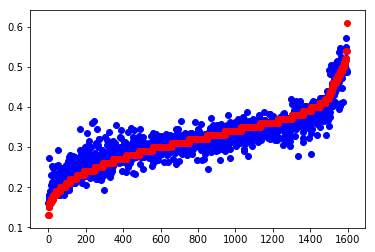

MSE                      = 0.000602987423438
MAE                      = 0.0173597963209
r2_score                 = 0.879527714597    (best_value is 1)
explained_variance_score = 0.879553704905    (best_value is 1)


In [84]:
predict_for_analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict[:,0]})
predict_for_analize_real = pd.DataFrame({'y_hold':y_real_hold, 'y_predict':y_real_predict[:,0]})

data_analize_func(predict_for_analize_fake)

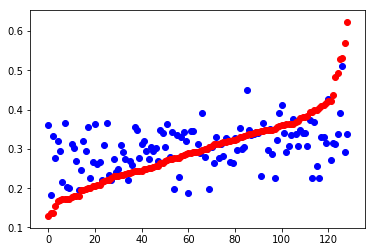

MSE                      = 0.00742496404786
MAE                      = 0.0639483756233
r2_score                 = 0.0812212789301    (best_value is 1)
explained_variance_score = 0.0872021100698    (best_value is 1)


In [85]:
data_analize_func(predict_for_analize_real)